## 8-  Machine Learning

El nombre de este apartado es un poco pomposo pero es importante entender que el **álgebra** juega un papel fundamental en el Machine Learning y para ello vamos a ver algunos conceptos que nos van a ser útiles en un futuro.

Hay muchas formas de dividir los problemas de Machine Learning, algunas de ellas:<br>

**<center>Supervised Learning | Unsupervised Learning</center>**
**<center>Probabilistic Methods | Non-probabilistic Methods</center>**
**<center>Modeling Approach | Optimization Techniques</center>**
**<center>...</center>**

Dentro de los problemas de **Supervised Learning** podemos encontrar (nos vamos a centrar solo en este caso porque vamos a explicar algunas herramientas que nos proporciona la álgebra para resolver ciertos problemas):

<img src="Images/reg_clas.png" style="width: 75%"/>

- **Regresión**: Dado un conjunto de datos, predecir una variable continua
- **Clasificación**: Dado un conjunto de datos, predecir un valor discreto (label/class...)

## 8.1 - Regresión Lineal

La **regresión lineal** es el caso más simple de **regresión**. Imaginaros que nos hemos ido a Islandia a ver géiseres (Geyser) y hemos medido durante un día cada vez que hace erupción y cuanto tiempo dura la erupción. Con estos datos nos gustaría predecir cuando va a ser la siguiente erupción.

Si observamos los datos, vemos como en el **eje X** tenemos el tiempo que el géiser estuvo en erupción, y luego en el **eje y**, tenemos el tiempo que tenemos que esperar a la próxima erupción. Vemos como claramente existe una **relación entre ambas variables, ¿no?**

<img src="Images/erupcion.png" style="width: 340px;" align="left"/><img src="Images/erupcion_graph.png" style="width: 290px;" align="left"/><img src="Images/reg_erupcion_graph.png" style="width: 265px;" align="left"/>

Así que mirando estos datos, **podríamos querer llegar a algún tipo de función**, una simplificación
donde simplemente tienes que tomar la entrada, **que es el tiempo que el géiser ha estado en erupción** y entonces la salida será **una predicción de cuánto tiempo creemos que vamos a tener que esperar a la próxima erupción.** Y mirando esto, la elección más natural es modelar esto con una función lineal. 

Este es el ajuste de regresión más simple, donde tienen una entrada que creemos que está relacionada de acuerdo a alguna función lineal con la salida. 

#### Función lineal

El modelo para este problema será una función lineal donde tendremos que la variable $y$ es el **tiempo de espera** y la variable $x$ es la **duración de la erupción**.

<center>$y = w_0 + x \cdot w_1$</center><br>
<center>$tiempo_{espera} = w_0 + duracion_{erupcion} \cdot w_1$</center>

$w_1$: *Pendiente / Slope*<br>
$w_0$: *Término independiente / Bias / Offset / Shift...* 

Donde $w_0$ y $w_1$ deben ser determinados a partir de los datos de entrada.

### ¿Cómo trasladamos esto a problemas con un mayor número de dimensiones?

Imagina que tenemos dos entradas y queremos predecir una salida basada en esas dos entradas. En ese caso, podríamos seguir utilizando una función lineal donde:

<center>$output = w_0 + input_{1} \cdot w_1 + input_{2} \cdot w_2$</center>

Geométricamente podría ser representado como:
<img src="Images/map_geometric.png" style="width: 340px;"/>

### Caso genérico

Por tanto, el objetivo de una **regresión** es:

Encontrar una función $f: \mathbb{R}^d \rightarrow \mathbb{R}$ tal que $y \approx f(x;w)$ para el conjunto de datos $(x, y)$. Una regresión es denominada **lineal** si la predicción $f$ es una función lineal con parámetros no conocidos $w$.

De una forma más genérica podemos escribir la **regresión** como:

<center>$y_{i} \approx  f(x_{i}; w) = w_0 + \sum_{j=1}^d x_{ij}w_{j}$</center>

*Nota:* Consideramos que tenemos más observaciones que dimensiones $d<n$

## 8.2 - Mínimos Cuadrados (Least Squares)

**Genial!!** Ya sabemos que es una regresión y como se clasifican algunos problemas de ML en el caso del géiser, ¿cómo podemos determinar los parámetros $w$ que nos devuelve la recta que mejor se ajusta a los datos?

<img src="Images/interesting2.gif" style="width: 340px;"/>

Si recapitulamos un poco... Tenemos un conjunto de datos $(x_1; y_1) ... (x_n, y_n)$ y queremos usar estos datos para determinar $w$, tal que $y_i \approx f(x_i, w)$ pero antes debemos tener una **"objective function"** para determinar que valores de $w$ consideramos por buenos. Para ello, vamos a usar **Mínimos cuadrados**

### Mínimos Cuadrados

Los **mínimos cuadrados** nos ayuda a elegir los valores de $w$ que minimizan la suma de los errores al cuadrado.<br><br>

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2$</center><br>

<center>$\DeclareMathOperator*{\argmin}{argmin} argmin$ = Minimizar</center>

Basicamente, el objetivo de los **mínimos cuadrados $L$** es minimizar la suma de los errores al cuadrado. Si observamos el siguiente plano, la **distancia vertical es el error.**

<img src="Images/least_squares.png" style="width: 340px;"/>

#### Ejemplo

Aquí hay un ejemplo muy sencillo donde tenemos como entrada un vector de 2 dimensiones con medidas de **educación** y **antigüedad** y como salida tenemos el **salario**. Basicamente queremos predecir los ingresos de una persona en base a su educación y antigüedad.

<img src="Images/ex_least.png" style="width: 340px;" align="left"/><br><br><br>
<b>Input</b>: (Educación, Antigüedad) $\in \mathbb{R}^2$<br><br>
<b>Output</b>: Salario $\in \mathbb{R}$<br><br>
<b>Model</b>: $salario \approx w_0 + (educacion) \cdot w_1 + (antigüedad) \cdot w_2$

## 8.3 - Mínimos Cuadrados - Matrices

Existen distintas formas para la ecuación: 

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2$</center><br>

Si desarrollamos dicha fórmula podemos llegar a la ecuación de **mínimos cuadrados** en forma matricial [aquí viene el desarrollo, por si le queréis echar un ojo](http://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes03b_LeastSquaresRegression.pdf):

<center>$X^{T}X W'=X^{T}y$</center><br>

O lo que es lo mismo:<br>
<center>$W'=(X^{T}X)^{-1}X^{T}y$</center>
    
Donde la matrix $X$, viene definida como:

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{11} & ... & x_{1d} \\
   1 & x_{21} & ... & x_{2d} \\
   ... & ... & ... & ... \\
   1 & x_{nd} & ... & x_{nd} \\
  \end{array} } \right]
$</center><br>

Se le añade un $1$ a cada fila de la matriz por convención y por la componente $w_0$ de la ecuación - Indicado por $\mathbb{R}^{d+1}$

### 8.3.1 - ¿Por qué n > d?

$n > d$ indica que el **número de observaciones** sea mayor que el **el número de dimensiones**, vamos a poner un ejemplo para entenderlo:

In [3]:
import pandas as pd

data = [['Teresa', 8.7, 7], ['Alex', 6.7, 8], ['Sara', 9, 9.1], ['Pepe', 7, 5.1]]
df = pd.DataFrame(data, columns=['Name', 'Media bachiller - Grade', 'Media selectividad - Test'])
df

/Users/alex/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Name,Media bachiller - Grade,Media selectividad - Test
0,Teresa,8.7,7.0
1,Alex,6.7,8.0
2,Sara,9.0,9.1
3,Pepe,7.0,5.1


El número `n` es el número de observaciones y el número `d` son las dimensiones. Es decir, si en nuestro problema tenemos **3 personas** a estudiar y vamos a analizar la influencia de **media de bachiller** y de su **media en selectividad**, tendremos que:

- Número observaciones `n`: 3 personas (Teresa, Alex, Sara)
- Número de dimensiones `d`: 2 variables (Media bachiller, Media selectividad)

<img src="./images/nd_x.jpg" width="400">

En el caso de que $n < d+1$ no podemos aplicar **mínimos cuadrados**, ya que $(X^TX)^{-1}$ no existe y habría un número infinito de soluciones.

<div class="alert alert-success">
    <b>Calcula $(X^TX)^{-1}$</b><br><br>
    
<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & 8.7 & 7 \\
   1 & 6.7 & 8 \\
   1 & 9 & 9.1 \\
   1 & 7 & 5.1 \\
  \end{array} } \right]
$</center><br>
</div> 

In [ ]:
#A = (5000x2)
#A = (20x2)
#A = (10101x2)

In [4]:
import numpy as np

X = np.array([[1, 8.7, 7],
              [1, 6.7, 8],
              [1, 9, 9.1],
              [1, 7, 5.1]])

print(X)

[[1.  8.7 7. ]
 [1.  6.7 8. ]
 [1.  9.  9.1]
 [1.  7.  5.1]]


In [5]:
X_t = np.transpose(X)
X_t

array([[1. , 1. , 1. , 1. ],
       [8.7, 6.7, 9. , 7. ],
       [7. , 8. , 9.1, 5.1]])

In [6]:
prod = np.dot(X_t, X)

inv_prod = np.linalg.inv(prod)
print(inv_prod)

[[15.79028203 -1.73113364 -0.26724424]
 [-1.73113364  0.31926267 -0.10617512]
 [-0.26724424 -0.10617512  0.15078341]]


<div class="alert alert-success">
    <b>Calcula $(X^TX)^{-1}$</b><br><br>
    
<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & 8.7 & 7 \\
   1 & 6.7 & 8 \\
  \end{array} } \right]
$</center><br>
</div> 

In [7]:
import numpy as np

X = np.array([[1, 8.7, 8],
              [1, 6.7, 8]])

print(X)

[[1.  8.7 8. ]
 [1.  6.7 8. ]]


In [8]:
X_t = np.transpose(X)
X_t

array([[1. , 1. ],
       [8.7, 6.7],
       [8. , 8. ]])

In [9]:
prod = np.dot(X_t, X)
print(prod)

[[  2.    15.4   16.  ]
 [ 15.4  120.58 123.2 ]
 [ 16.   123.2  128.  ]]


In [10]:
inv_prod = np.linalg.inv(prod)
print(inv_prod)

LinAlgError: Singular matrix

### 8.3.2 - La filosofía detrás de los mínimos cuadrados

¿Os acordais de cuando hablamos de los sistemas de ecuaciones? 

<img src="./Images/secuaciones.png" width=50%>

Cuando un sistema era incompatible significaba que tenía infinitas soluciones, pero hay una forma de encontrar una solución aproximada y aquí es donde entra en juego: **Los Mínimos Cuadrados**.

**Supongamos que tratamos de resolver un sistema de la forma Ax = b** y que no existe solución para este sistema. En este caso, puede ser interesante estudiar para qué vector o vectores $x'$, $Ax' ≈ b$, esto es, tratamos de buscar una solución aproximada del sistema.

Una forma de interpretar esta aproximación es la siguiente:
Si Ax' ≈ b, entonces podemos intentar encontrar x' tal que kAx' − bk sea lo menor posible.
Es decir, tratamos de resolver el problema minx ‖Ax − b‖ 

Si el sistema tiene solución, entonces el mínimo del problema anterior es cero, y por tanto Ax = b; pero si no hay solución, tiene sentido buscar el vector x que haga menor esa norma, y por tanto que más se parece a una solución.

Al final, al igual que hemos hecho antes, desarrollamos dicha expresión, se llega a la conclusión de que se trata de resolver el sistema:

$$A^TAx'=A^Tb$$

## 8.4 - "Ampliando" la Regresión Lineal

Lo bueno de la **regresión lineal** y de los **mínimos cuadrados** es que es muy versátil. Seguro que pensáis que calcular una función lineal es un problema super simple, teniendo en cuenta que solo estamos dibujando una línea a través de nuestro hiperplano, pero eso no es así. Las funciones lineales son la base de **TODO**, incluso de las redes neuronales.

<div class="alert alert-success">
    <b>Os he dejado un extra sobre los perceptrones: EXTRA5_Perceptron</b>
</div> 

$121x^2 + 242x + 124$

### 8.4.1 - "Ampliando" las regresiones lineales

Bueno, volvamos a las **regresiones lineales**😃. Como hemos dicho, las **regresiones lineales** y los **mínimos cuadrados** son herramientas muy potentes. Recuerda que la **regresión lineal** se llama regresión lineal porque la salida es lineal:<br><br>

<center>$y_{i} \approx  f(x_{i}; w) = w_0 + \sum_{j=1}^d x_{ij}w_{j}$</center>

Así que, tenemos una función lineal de los pesos $w$, no necesariamente de las entradas $x$. En el siguiente ejemplo, la regresión lineal va a ser algo que **NO** queramos usar, porque no va a modelar correctamente nuestros datos, ¿qué hacemos entonces?:

<img src="./images/pol_regresion.png" width=50%>

Si miramos la ecuación original de la regresión lineal, tenemos la salida $y$, que es aproximadamente igual a la entrada $x$
multiplicado por un peso $w_1$, más un desplazamiento $w_0$. Básicamente estamos diciendo que los datos tienen que ser modelados por una línea, pero no es lo ideal en este caso.

Pero podríamos decir ahora que nuestra salida $y$ sea de la forma:

<img src="./images/pol_regresion2.png" width=50%>

Esto es lo que se denomina `regresión polinomial` usando una función de 3º orden. Lo mejor de todo es que se resuelve de la misma forma que la `regresión lineal`, usando: 

<center>$X^{T}X W'=X^{T}y$</center><br>

O lo que es lo mismo:<br>
<center>$W'=(X^{T}X)^{-1}X^{T}y$</center>
    
La única diferencia es que nuestra matriz $X$ con un polinomio de grado $p$, será de la forma:

<div class="alert alert-block alert-danger">
    <b>Nota:</b> $d=1$ indica que solo tiene una variable, por ejemplo: edad / dinero; ...
</div><br><br>

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_1 & x_1^2 & ... & x_n^p \\
   1 & x_2 & x_2^2 & ... & x_n^p \\
   1 & ... & ... & ... & ... \\
   1 & x_n & x_n^2 & ... & x_n^p \\
  \end{array} } \right]
$</center>

Donde `p` será el orden de nuestro polinomio.

#### Influencia del grado del polinomio en nuestra regresión

<img src="./images/gif-pol-reg.gif" width=50%>

### - Regresión polinomial en $\mathbb{R}^2$ (2 dimensiones)

Como hemos visto la regresión polinomial se resuelve de la misma forma que una regresión linea, la única diferencia es que tendremos más componentes en nuestra matriz $X$. El `número de columnas` vendrá dado por:

<center>$(orden \,\, polinomio)\, x \,(dimensiones) + 1$</center><br>

En ese caso para un **polinomio de orden 2**:<br>
<center>$
  y_i = w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i1}^2 + w_4x_{i2}^2
$</center>

Para un **polinomio de orden 3**:<br>

<center>$
  y_i = w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i1}^2 + w_4x_{i2}^2 + w_5x_{i1}^3 + w_6x_{i2}^3
$</center>

<img src="./images/pol_3order.png" width=50%>

### 8.4.2 - Resumen

#### ¿Qué es la regresión?

La `regresión` es un modelo matemático que busca determinar la relación entre una variable dependiente $y$ con respecto a otras variables independientes $x_n$.

En la regresión, dado un conjunto de datos, nos va a predecir una variable continua. 

<img src="./images/regresion.jpg" width=50%>

#### ¿Cuál es el objetivo de la regresión?

El objetivo de una **regresión** es encontrar una función $f: \mathbb{R}^d \rightarrow \mathbb{R}$ tal que $y \approx f(x;w)$ para el conjunto de datos $(x, y)$. Una regresión es denominada **lineal** si la predicción $f$ es una función lineal con parámetros no conocidos $w$.

De una forma más genérica podemos escribir la **regresión** como:

<center>$y_{i} \approx  f(x_{i}; w) = w_0 + \sum_{j=1}^d x_{ij}w_{j}$</center>

*Nota:* Consideramos que tenemos más observaciones que dimensiones $n > d$<br><br>
<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{11} & ... & x_{1d} \\
   1 & x_{21} & ... & x_{2d} \\
   ... & ... & ... & ... \\
   1 & x_{nd} & ... & x_{nd} \\
  \end{array} } \right]
$</center>

#### ¿Cómo la resolvemos?

Usando **mínimos cuadrados** cuyo objetivo es encontrar los valores de $w$ que minimizan la suma de los errores al cuadrado.
Existen distintas formas para la ecuación: 

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2$</center><br>

Si desarrollamos dicha fórmula podemos llegar a la ecuación de **mínimos cuadrados** en forma matricial [aquí viene el desarrollo, por si le queréis echar un ojo](http://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes03b_LeastSquaresRegression.pdf):

<center>$X^{T}X W'=X^{T}y$</center><br>

O lo que es lo mismo:<br>
<center>$W'=(X^{T}X)^{-1}X^{T}y$</center>
    
    
#### Regresion polinomial

Para casos en los que no podamos modelar nuestro problema con una **función lineal** podemos aplicar un polinomio para ello. En este caso se llamaría **regresión polinomial** y se resuelve de la misma forma:

<center>$X^{T}X W'=X^{T}y$</center><br>
<center>$W'=(X^{T}X)^{-1}X^{T}y$</center>

#### Matriz X

La única diferencia entre la regresión lineal y la regresión polinomial es como escribimos la matriz $X$, aquí algunos ejemplos:

- Problema con 2 dimensiones

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{1d} & x_{1d} & ... & x_{nd} \\
   1 & x_{2d} & x_{2d} & ... & x_{nd} \\
   1 & ... & ... & ... & ... \\
   1 & x_{nd} & x_{nd} & ... & x_{nd} \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 & x_{11} & x_{12}\\
   1 & x_{21} & x_{22}\\
   1 & ... & ...\\
   1 & x_{n1} & x_{n2}\\
  \end{array} } \right] 
$</center>

- Problema con 3 dimensiones y 4 observaciones

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{1d} & x_{1d} & x_{1d} &... & x_{nd} \\
   1 & x_{2d} & x_{2d} & x_{2d} &... & x_{nd} \\
   1 & x_{3d} & x_{3d} & x_{3d} &... & x_{nd} \\
   1 & x_{4d} & x_{4d} & x_{4d} &... & x_{nd} \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 & x_{11} & x_{12} & x_{13} \\
   1 & x_{21} & x_{22} & x_{23} \\
   1 & x_{31} & x_{32} & x_{33} \\
   1 & x_{41} & x_{42} & x_{43} \\
  \end{array} } \right] 
$</center>

- Problema con 4 observaciones y 2 dimensiones, modelado con un polinomio de 2º grado

<center>$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{1d} & x_{1d} & x_{1d}^2 &... & x_{nd}^p \\
   1 & x_{2d} & x_{2d} & x_{2d}^2 &... & x_{nd}^p \\
   1 & x_{3d} & x_{3d} & x_{3d}^2 &... & x_{nd}^p \\
   1 & x_{4d} & x_{4d} & x_{4d}^2 &... & x_{nd}^p \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 & x_{11} & x_{12} & x_{11}^2 & x_{12}^2 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 \\
   1 & x_{31} & x_{32} & x_{31}^2 & x_{32}^2 \\
   1 & x_{41} & x_{42} & x_{41}^2 & x_{42}^2 \\
  \end{array} } \right] 
$</center>


### 8.5 Gradient Descent

Hemos visto como **Least Squares/Mínimos Cuadrados** nos permite encontrar la recta que mejor aproxima nuestros datos. Los métodos que nos permiten encontrar la solución mínima o máxima se llaman **métodos de optimización**. Existe numerosos tipos de métodos de optimización, pero nos vamos a centrar en uno de los más usados hoy en día en el mundo del Machine Learning - **Gradient Descent**.

**Gradient Descent** es un método de optimización iterativo (cada iteración que ejecutamos estamos un poco más cerca del mínimo de la función - solución). 
 

<center>$y_{i} \approx  f(x_{i}; w) = w_0 + \sum_{j=1}^d x_{ij}w_{j}$</center>

Podemos convertirlo a matrices:

<center>$y_{i} \approx  f(x_{i}; w) = XW$</center>

Y queremos encontrar:

* **Los argumentos $w$ que minimiza la función** - $\underset{w}{\operatorname{argmin}}f(w)$

<div class="alert alert-success">
    <b>Nota</b> $\min f(x)$ y $\arg \min f(x)$ son cosas distintas. Un ejemplo:
</div> 

Considera la función $f(x) = 100 + (x - 3)^2$

$\min f(x) = f(\arg \min f(x))$

Entonces:

$\frac{df(x)}{x} = 2(x - 3)$<br>
$\arg \min 2(x - 3) = 0$<br>
$\arg \min f(x) = 3$

Por otro lado:

$\min f(x) = f(\arg \min f(x)) = 100 + (3 - 3)^2$<br>
$\min f(x) = 100$

Podemos graficarlo

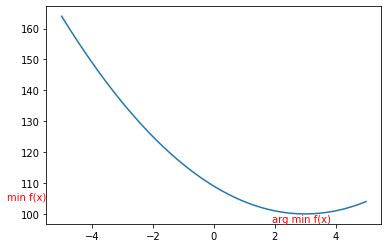

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots() 

x = np.linspace(-5, 5, 100)

# calculate the y value for each element of the x vector
y = 100 + (x - 3)**2 

axs.annotate('arg min f(x)',
            xy=(0.85, 0), xycoords='axes fraction',
            xytext=(-0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            color="r")

axs.annotate('min f(x)',
            xy=(0, 0.1), xycoords='axes fraction',
            xytext=(-0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            color="r")

axs.plot(x, y)

Como queremos encontrar el valor de $w$ que hace mínimo $f(x)$, es decir $\arg \min f(x)$, los pasos a seguir son:

* Empezar en algún punto aleatorio de la curva
* Iterativamente, movernos en la dirección de mayor pendiente $\nabla f(x)$ con pasos con tamaño $\eta$

\begin{equation}
    x := x - \eta \cdot \nabla f(x)
\end{equation}

\begin{equation}
    x_t = x_{t-1} - \eta \cdot \nabla f(x)
\end{equation}

El parámetro $\eta$ se denomina **learning rate** y es el parámetro que se encarga de medir el "step size" en cada iteración mientras nos movemos hacia el mínimo de la función. 

<div class="alert alert-success">
    <b>¿Por qué el valor negativo en la ecuación?</b>
</div> 


**DEMO GRADIENT DESCENT:** https://developers.google.com/machine-learning/crash-course/fitter/graph

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class GD(): 
    def __init__(self, eta=0.1, x0=0, max_iter=50, diff_to_stop=0.01, delta=0.01): 
        self.x0 = x0 #randomly initialize any value
        self.delta = delta #used for gradient calculations
        self.eta = eta #learning rate 
        self.diff_to_stop = diff_to_stop #stop the algorithms if steps are smaller than this value
        self.max_iter = max_iter #when to stop

    def run(self, f, plot_method=None):       
        plt.figure(figsize=(8, 4))
        xx = np.linspace(-10, 10, 100)
        yy = f(xx)
        plt.plot(xx, yy)
        plt.grid()
        
        x_new = self.x0
        iter_no = 0
        while True:
            iter_no += 1

            #main algorithm
            x = x_new #note: x_new is the position of the previous move
            grad = (f(x+self.delta) - f(x))/self.delta #evaluate the gradient at f(x)
            x_new = x - self.eta*grad #move in the direction of gradient
            #end of main algorithm

            if plot_method is 'scatter':
                plt.scatter(x_new, f(x_new), color='r')
            else:
                plt.arrow(x, f(x), x_new-x, f(x_new)-f(x), head_width=0.3, head_length=2, color='r')

            step_size = np.abs(x_new - x)
            if step_size <= self.diff_to_stop:
                print('Successfully converged with a step size of {} after {} iterations!'.format(step_size, iter_no))
                plt.scatter(x_new, f(x_new), s=200, marker='*')
                break
            elif iter_no == self.max_iter:
                print('Max iterations completed! Convergence cannot be guaranteed. Step size={}'.format(step_size))
                plt.scatter(x_new, f(x_new), s=200, marker='*')
                break

<>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/zb/r_57byp97tx0mcljd3fd0_640000gn/T/ipykernel_1700/3173065574.py:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if plot_method is 'scatter':


<div class="alert alert-success">
    <b>Vamos a analizar que sucede cuando modificamos los parámetros</b>
</div> 

* Incrementa el número de iteraciones a 50 Increase the maximum number of iterations in order to 50.
* Cambia el learning rate a diferentes valores $\eta \in \{0.05, 0.1, 0.8, 1.1\}$.

Max iterations completed! Convergence cannot be guaranteed. Step size=0.6557695999999957


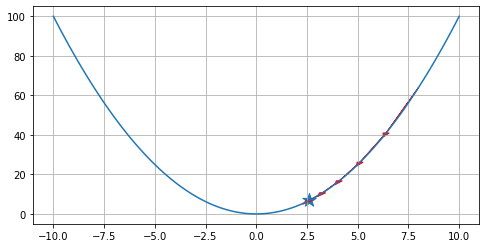

In [17]:
def f(x, p=1, q=0, r=0):
    return p*(x-q)**2 + r

GD(eta=0.1, x0=8, max_iter=5, diff_to_stop=0.01, delta=0.01).run(f)

¿Qué sucede en este caso? 
$$f(x) = -\exp(-(x-2)^2) - 0.5 \exp(-(x+2)^2)$$

Sugerencia: max_iter en $100$, x0 en $-3$. 

Successfully converged with a step size of 3.4390903902448144e-06 after 15 iterations!


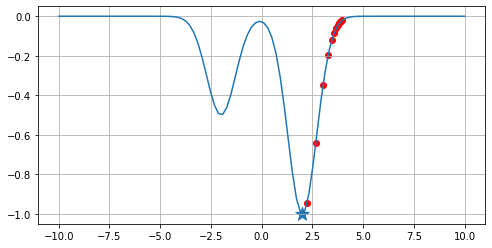

In [25]:
def f_multimodal(x):
    return -np.exp(-(x-2)**2) - 0.5*np.exp(-(x+2)**2)

GD(eta=0.5, x0=4, max_iter=100, diff_to_stop=0.01, delta=0.01).run(f_multimodal, plot_method='scatter')

# Local minimum - Alguna solución?

### Gradient Descent para Linear Regression

Aplicar Gradient Descent para un modelo de regression lineal no tiene ninguna complejidad. Nuestro modelo viene dado por la siguiente ecuación:

$$f(x)=w_0+w^T x.$$

Debemos optimizar esa función para encontrar los valores de $w$ que la hacen mínima, ¿cómo medimos "qué la hace mínima y qué no"? Usando **Residual Sum Squares (RSS)**, que basicamente mide cuanto se aleja el modelo de los valores reales.

<img src="Images/least_squares.png" style="width: 340px;"/>

**¿Pero esto no es lo mismo que Least Squares?** Si y no... **Least Squares es un método para construir un modelo y RSS es una medida**. Se basan en lo mismo, en medir la distancia entre los valores predichos y los valores verdaderos. Entonces, aplicando RSS a nuestra regresión:

$$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$$

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

Y lo que queremos es minimizar esta distancia, para que el modelo se acerque lo máximo posible a los valores verdaderos.

$$\nabla RSS(w) = X^T(Xw^t-y)$$

En resumen, el gradient descendiente para una regresión lineal, se basa en resolver esta ecuación de forma iterativa:

$$w^{t+1} = w^t - \eta * \nabla RSS(w)$$